# Rain in Australia EDA


In [11]:
# Packages for data analysis
import pandas as pd
import numpy as np
from itertools import combinations

# Packages for visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [8]:
# import command for the weatherAUS.csv file 

rain = pd.read_csv('weatherAUS.csv', parse_dates=['Date'])
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data Inspection

## Data Types

In [ ]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

### Comment:

    *The data set has 23 columns, including 22 features and 1 target variable
    *The data contains both numerical and categorical features



In [ ]:
# Extract numerical features
num_cols=rain.select_dtypes(include=np.number).columns.tolist()
print('There are', len(num_cols), 'numerical features, including:')
print(num_cols, "\n")

# Extract categorical features
cat_cols=rain.select_dtypes(object).columns.tolist()
print('There are', len(cat_cols), 'categorical features, including:')
print(cat_cols)

There are 16 numerical features, including:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 

There are 6 categorical features, including:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


## Comment

    There are 16 numerical features, including:
        ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

    There are 6 categorical features, including:
        ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']



## Data Quality

In [ ]:
# Checking data completeness
missing = pd.DataFrame(rain.isnull().sum(), columns=['No. of missing values'])
missing['% missing_values'] = (missing/len(rain)).round(2)*100
missing

,No. of missing values,% missing_values
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0


<AxesSubplot:>

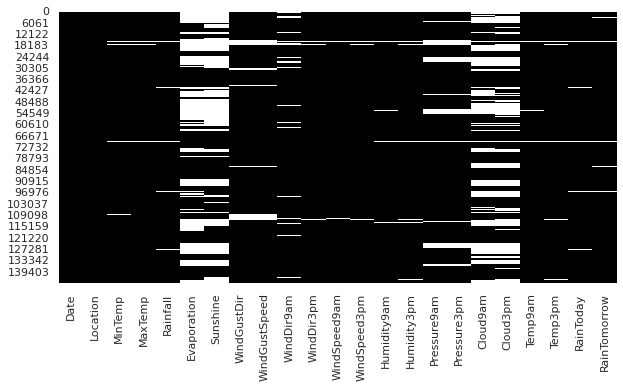

In [ ]:
# Where are missing values located in the dataset (white color indicates missing values)
plt.figure(figsize=(10,5))
sns.heatmap(rain.isnull(), cbar = False, cmap="gray")

### Comment

    1. Evaporation, Sunshine, Cloud9am, Cloud3pm contain a lot of missing values (i.e 40-50% of the cell is empty) throughout the dataset. Therefore we will drop Evaporation, Sunshine, Cloud9am, Cloud3pm from the dataset.
    
    2. The target variable RainTomorrow has two missing data, we will drop these two rows from the dataset
    3. For other features, there is a small number of data missing, we will handle these missing values with an appropriate method later in the study



In [ ]:
# Drop features that have a significant proportion of missing values
rain.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

# Remove rows where target variables are missing
rain.dropna(how='all', subset=['RainTomorrow'], inplace=True) # Remove rows where target varible is missing

## Data Summary

    A quick glance at categorical feature

In [ ]:
print('There are', len(cat_cols), 'categorical features, including:', "\n", cat_cols, '\n')
# Extract details on categorical features
for i in cat_cols:
    unique_no = rain[i].nunique()
    unique_name = rain[i].unique().tolist()
    print(i, 'has', unique_no, 'unique variables, including:')
    print(unique_name, "\n")

There are 6 categorical features, including: 
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 

Location has 49 unique variables, including:
['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru'] 

WindGustDir has 16 unique variables, including:
['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE', 'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'] 

WindDir9am has 16 unique variables, includ

A quick glance at numerical features

In [ ]:
rain.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235
std,6.403283,7.117618,8.465173,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


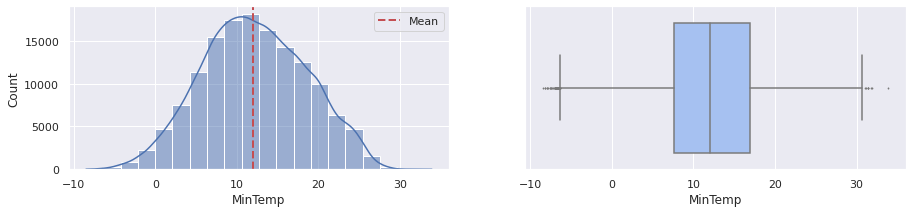

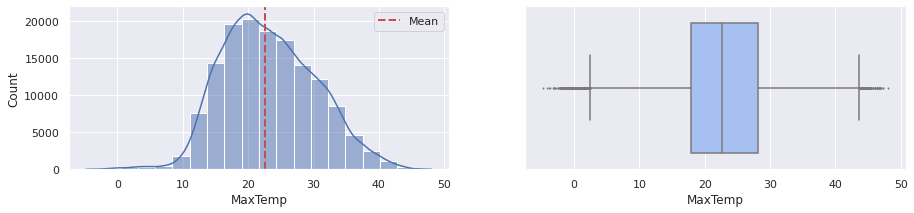

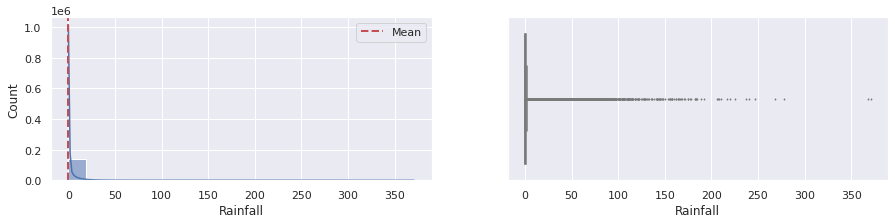

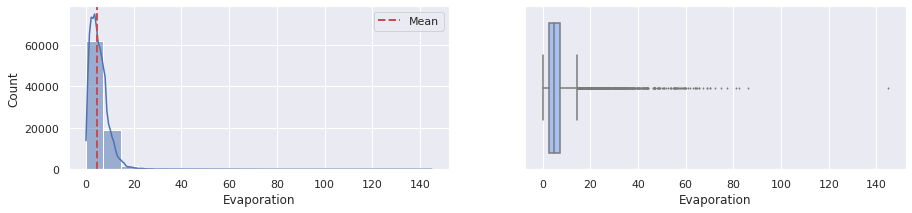

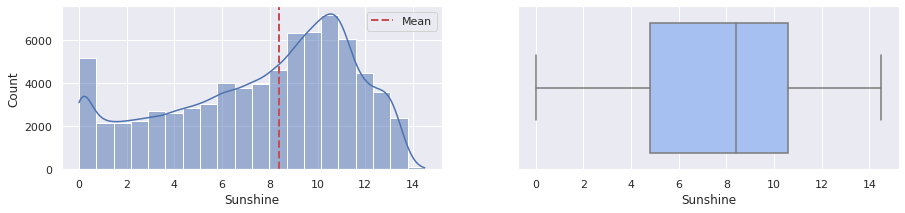

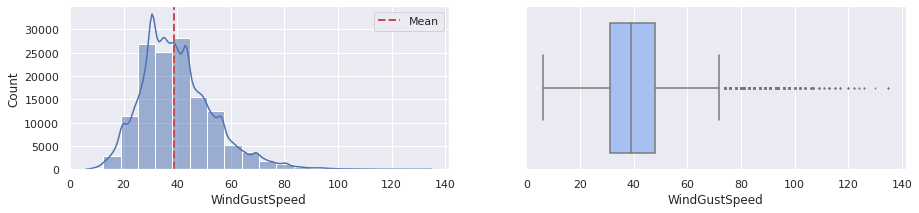

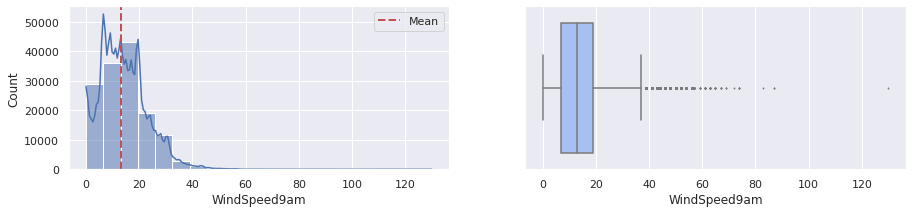

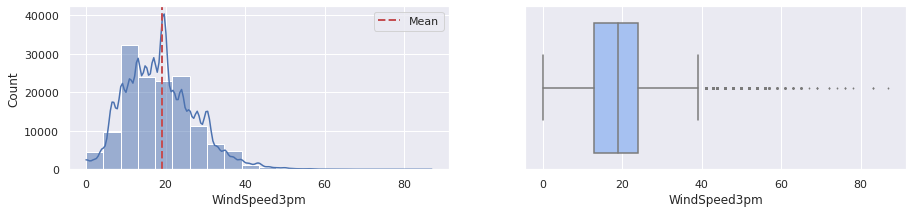

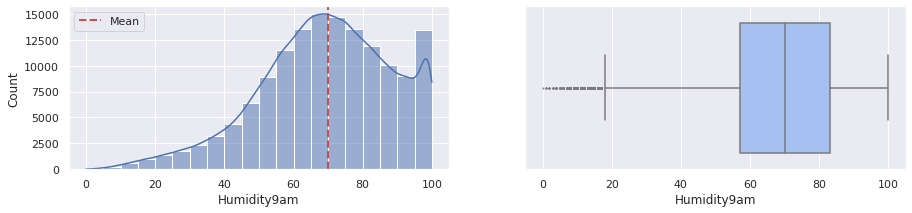

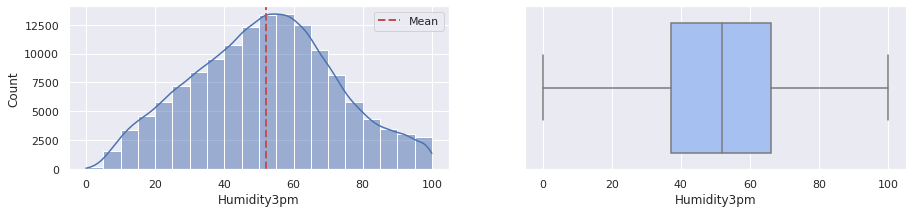

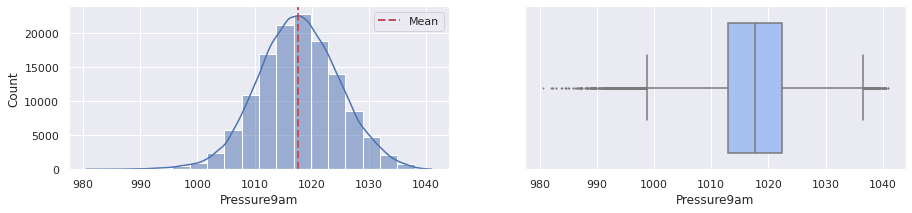

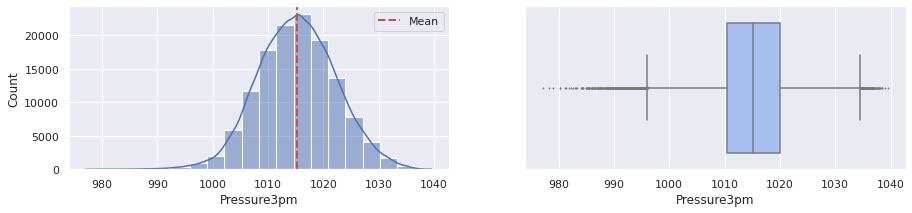

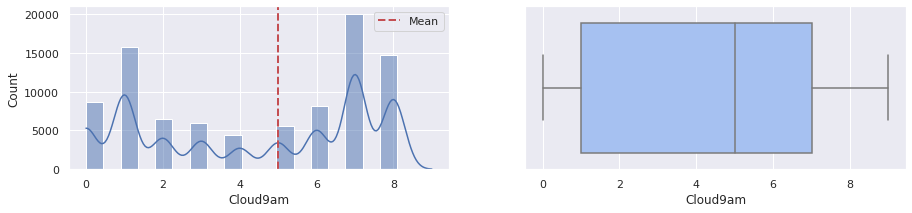

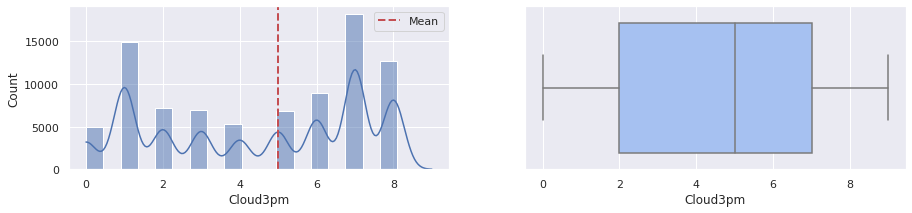

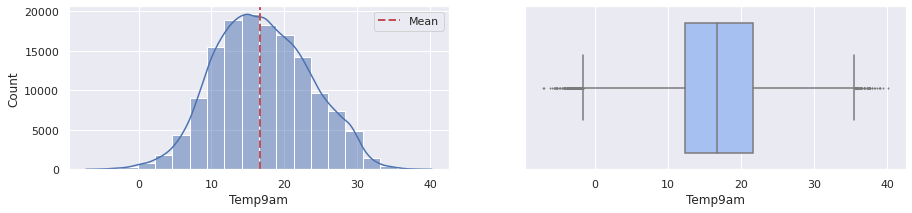

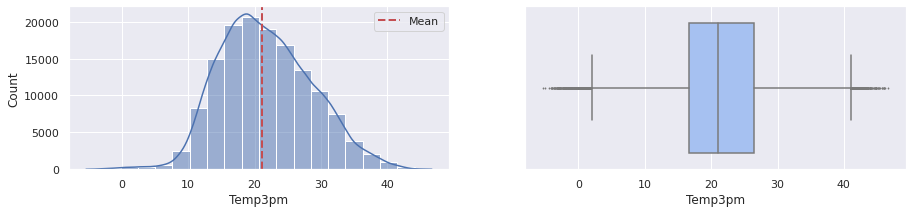

In [27]:
# Plots on numerical features to check data quality and data distribution

num_cols=rain.select_dtypes(include=['int64','float64']).columns.tolist() # a revised list of numerical features  

for i in num_cols:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(x=rain[i], bins=20, kde=True, ax=axs[0])
    sns.boxplot(x=rain[i], ax = axs[1], color='#99befd', fliersize=1)
    
    axs[0].axvline(rain[i].median(), color='r', linewidth=2, linestyle='--', label='Mean')
    axs[0].legend()

#### Comment : 


    The mean values for different features range from 10+ to 1000+, as these features are not in a similar scale, 
    The Rainfall data seems to have a huge distortion, we will drop this feature for our analysis


<AxesSubplot:>

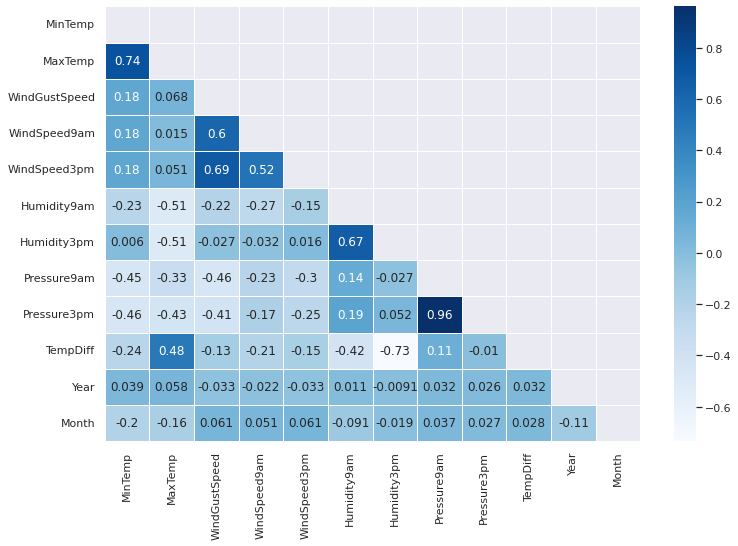

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
mask = np.triu(np.ones_like(rain.corr(), dtype=bool))
sns.heatmap(rain.corr(), annot=True, cmap="Blues", mask=mask, linewidth=0.5)

#### Comment some of the features have very strong relationship:

    1. Temp9am ~ MaxTemp (89%) 
    2. Temp3pm ~ MaxTemp (98%)
    3. Pressure3pm ~ Pressure9am (96%)
    4. Temp9am ~ MinTemp = 90%
    
    Columns to drop : Rainfall, Temp9am , Temp3pm
    

In [ ]:
cols_to_drop = ['Rainfall', 'Temp9am', 'Temp3pm']
rain.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
rain.head()

,Date,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,No,No
1,2008-12-02,Albury,7.4,25.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,No,No
2,2008-12-03,Albury,12.9,25.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,No,No
3,2008-12-04,Albury,9.2,28.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,No,No
4,2008-12-05,Albury,17.5,32.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,No,No


# Exploratory Data Analysis (EDA)

 Target Variable : `RainTomorrow`

<AxesSubplot:ylabel='RainTomorrow'>

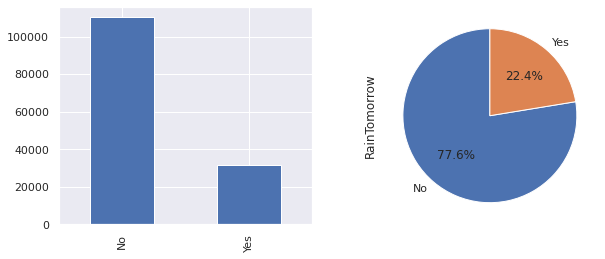

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
rain['RainTomorrow'].value_counts().plot(kind='bar', ax=axs[0])
rain['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

#### Comment

   - The target variable RainTomorrow returns two values, 'Yes' and 'No'
   - 78% of result is 'Yes' and 22% is 'No'

 `Location`: which cities has the most raining days?

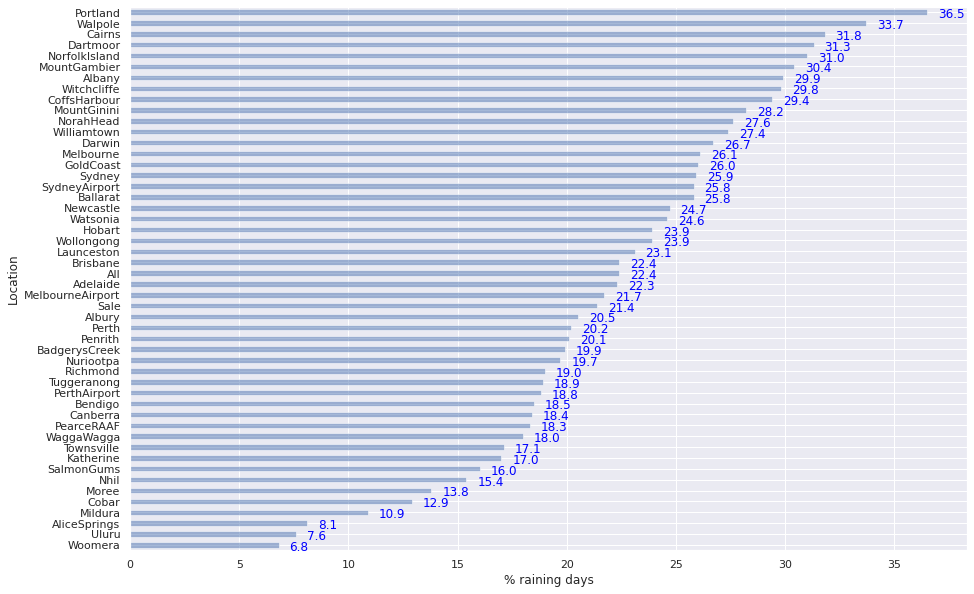

In [ ]:
#rain_by_location =rain.groupby('Location')['RainTomorrow'].count()/rain['Location'].count()
rain_by_location = pd.crosstab(index=rain['Location'], columns=rain['RainTomorrow'], values=rain['RainTomorrow'], aggfunc='count', margins=True)
rain_by_location['% Yes'] = (rain_by_location['Yes']/rain_by_location['All']).round(3)*100
# rain_by_location.sort_values(by='% Yes', ascending=False)
f, ax = plt.subplots(figsize=(15,10))
rain_by_location['% Yes'].sort_values().plot(kind='barh', alpha=0.5)
ax.set_xlabel ('% raining days')

# Label values 
y = rain_by_location['% Yes'].sort_values().values
for h, v in enumerate(y):
    ax.text(v+0.5 , h-0.5 , round(float(v),1), color='blue')


#### Comment

   - Portland, Walpole, Cairns are the top3 locations in terms of number of raining days
   - Woomera, Uluru, AliceSprings are the bottom 3 of the list, with less than 10% of raining days



### Whether `MinTemp` and `MaxTemp` impact `RainTomorrow`?

Text(30, 28, 'MaxTemp=MinTemp')

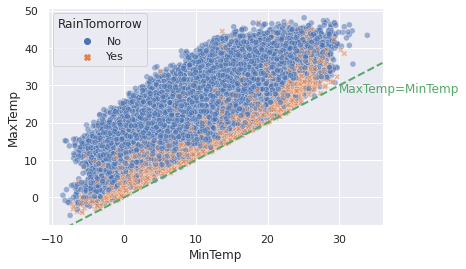

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x='MinTemp', y='MaxTemp', data=rain, hue='RainTomorrow', alpha=0.5, style='RainTomorrow')
x = y = plt.xlim()
plt.plot(x, y, linestyle='--', color='g', lw=2, scalex=False, scaley=False)
plt.annotate('MaxTemp=MinTemp', xy=(30,30), xytext=(30,28), color='g')

##### Comment
- `MaxTemp` and `MinTemp` do not seem to directly impact the chance of raining tomorrow
- However, when we draw a MaxTemp = MinTemp line, it seems that most of the 'Yes' result is falling close to this line 
- This implies that there is a higher chance to rain tomorrow if there is little variation between the max and min temperature
- We will verify this by adding a new feature `TempDiff` to the dataset (`TempDiff` = `MaxTemp` - `MinTemp`)

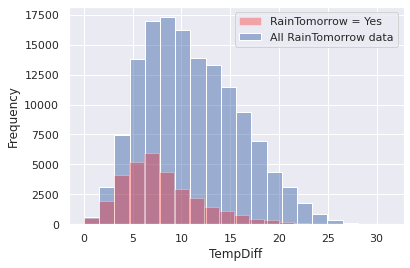

In [ ]:
# Adding a new feature 'TempDiff'
rain['TempDiff'] = rain['MaxTemp'] - rain['MinTemp']

# TempDiff distribution
sns.histplot(x='TempDiff', data=rain, bins=20, alpha=0.5, label='All RainTomorrow data')
rain[rain['RainTomorrow']=='Yes']['TempDiff'].plot.hist(bins=20, color='red', alpha=0.3, label='RainTomorrow = Yes')
plt.legend()

#### Comment
- It can be easily seen from the chart that when tempeature different is less than 5, there is a higher chance of raining tomorrow. 

### How about wind speed and direction? 
- There are 3 different numerical features (`WindGustSpeed`,`WindSpeed9am` and `WindSpeed3pm`) that are associated with wind speed.   
- There are 3 categorized features (`WindGustDir`,`WindDir9am` and `WindDir3pm`) that are associated with wind direction.   
- Can we draw any conclusion from these values?

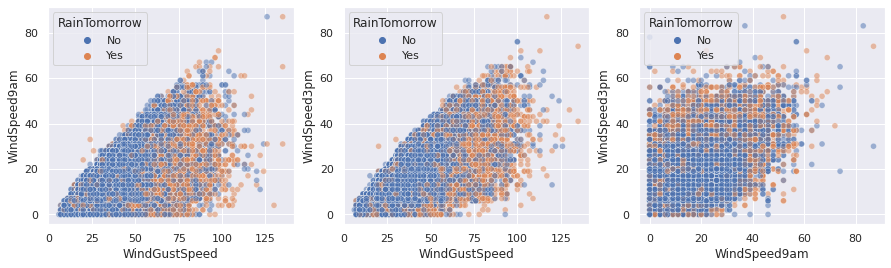

In [ ]:
# Draw scatter charts with different wind speed data
wind_speed = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
wind_speed_combination = [i for i in combinations(wind_speed,2)]
fig, axs = plt.subplots(1,3,figsize=(15, 4))
for i, ws in enumerate(wind_speed_combination):
    sns.scatterplot(x=ws[0], y=ws[1], data=rain, hue='RainTomorrow', ax=axs[i], alpha=0.5)

##### Comment
- `WindGustSpeed` seems to be a more important factor than `WindSpeed9am` and `WindSpeed3pm`
- There is a higher chance of raining tomorrow when `WindGustSpeed`is higher than 75

### What else ?

<AxesSubplot:xlabel='Humidity9am', ylabel='Pressure3pm'>

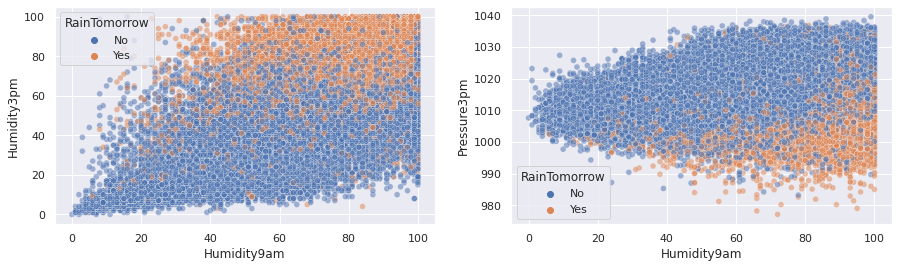

In [ ]:
# Relationship between humidity/pressure and RainTomorrow
fig, axs = plt.subplots(1,2,figsize=(15, 4))
sns.scatterplot(x='Humidity9am', y='Humidity3pm', data=rain, hue='RainTomorrow', alpha=0.5, ax=axs[0])
sns.scatterplot(x='Humidity9am', y='Pressure3pm', data=rain, hue='RainTomorrow', alpha=0.5, ax=axs[1])

##### Comment

    Higher chance of raining tomorrow with higher humidity and lower pressure



In [ ]:
both_rain = rain.loc[(rain['RainToday']=='Yes') & (rain['RainTomorrow']=='Yes')]
both_not_rain =  rain.loc[(rain['RainToday']=='No') & (rain['RainTomorrow']=='No')]
today_rain_tmr_not_rain = rain.loc[(rain['RainToday']=='Yes') & (rain['RainTomorrow']=='No')]
today_not_rain_tmr_rain = rain.loc[(rain['RainToday']=='No') & (rain['RainTomorrow']=='Yes')]
rain_tmr = rain.loc[rain['RainTomorrow']=='Yes']

print('both_days_rain:', both_rain['Date'].count())
print('both_days_not_rain:',  both_not_rain['Date'].count())
print('today_rain_tmr_not_rain:', today_rain_tmr_not_rain ['Date'].count())
print('today_not_rain_tmr_rain:', today_not_rain_tmr_rain ['Date'].count())
print('rain_tmr:', rain_tmr['Date'].count())

both_days_rain: 14597
both_days_not_rain: 92728
today_rain_tmr_not_rain: 16858
today_not_rain_tmr_rain: 16604
rain_tmr: 31877


##### Comment
- There are 31877 'Yes' values within RainTomorrow, and 14597 values of both days rain (~46% of total Yes RainTomorrow)
- This means that if today rains, there is a high chance that tomorrow will rain 

Text(0, 0.5, '% Raining days')

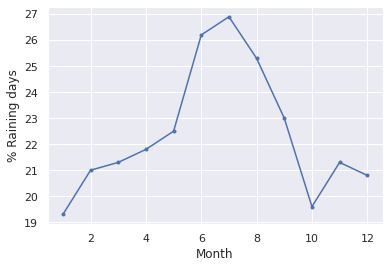

In [ ]:
# Extract `Year` and 'Month' information from Date
rain['Year'] = pd.DatetimeIndex(rain['Date']).year
rain['Month'] = pd.DatetimeIndex(rain['Date']).month

rain_month = pd.crosstab(index=rain['Month'], columns=rain['RainTomorrow'], margins=True)
rain_month['%Yes'] = (rain_month['Yes'] / rain_month['All']).round(3)*100 
rain_month.iloc[:-1,-1].plot(style='.-')
plt.xlabel('Month')
plt.ylabel('% Raining days')

##### Comment

    Higher chance of raining between June and August



### Conclusion from EDA
To sum up, there is a higher chance of raining tomorrow when:
- Little variation of temperature throughout the day
- Humidity is high
- Pressure is low
- WindGustSpeed is high
- Raining today
- June, July and August